In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle

In [107]:
# Load Pickle descriptor 
desc5 = joblib.load('./desc/new_desc5.pkl')
desc10 = joblib.load('./desc/new_desc10.pkl')
desc15 = joblib.load('./desc/new_desc15.pkl')
desc20 = joblib.load('./desc/new_desc20.pkl')
desc25 = joblib.load('./desc/new_desc25.pkl')

In [108]:
# Load Data Train csv
dataset = pickle.load(open('Train_Test/train_bams.p','rb'))

In [109]:
# Data train dan validasi(test)
train, val = train_test_split(dataset, test_size = 0.2, random_state = 10)
train.shape, val.shape 

((85, 1876), (22, 1876))

In [110]:
y_train = dataset.iloc[:,[-1]].values

In [111]:
# model
model = SVR(kernel = 'rbf', gamma = 'scale')

In [112]:
desc_jum = [5,10,15,20,25]
mse_array = []
for i in range(len(desc_jum)):
    sel = joblib.load(f'./desc/new_desc{desc_jum[i]}.pkl')
#     print(sel)
    x_train = dataset.loc[:,sel].values
    mmscaler = MinMaxScaler()
    mmscaler.fit(x_train)
    sc_x_train = mmscaler.transform(x_train)
    model.fit(sc_x_train, y_train)
    y_pred = model.predict(sc_x_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_array.append(mse)

C:\Users\Bams\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bams\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bams\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bams\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [113]:
mse_array

[0.21161062132565703,
 0.22687751121303137,
 0.20078032416054187,
 0.23434230044852628,
 0.11991606109634084]

In [114]:
# pickle.dump(mse_array, open( "mse/MSE_RBF.p", "wb" ))

In [116]:
pickle.load(open( "mse/MSE_RBF.p", "rb"))

[0.21161062132565703,
 0.22687751121303137,
 0.20078032416054187,
 0.23434230044852628,
 0.11991606109634084]

In [115]:
pickle.load(open( "mse/MSE_Linear.p", "rb"))

[0.4961397387924584,
 0.42753564545390293,
 0.3291043465817726,
 0.352638397448194,
 0.31066591170388036]

In [117]:
pickle.load(open( "mse/MSE_Poly.p", "rb"))

[0.37689530695540674,
 0.18251218665892602,
 0.15007599273956632,
 0.15350797718592196,
 0.07560654450702467]

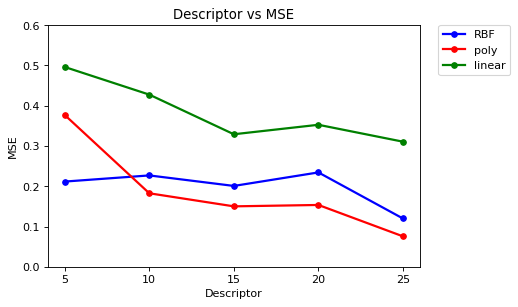

In [2]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

x = [5,10,15,20,25]
# mse_rbf
mse_rbf = pickle.load(open( "mse/MSE_RBF.p", "rb"))
# r2_poly
mse_poly = pickle.load(open( "mse/MSE_Poly.p", "rb"))
# r2_linear
mse_linear = pickle.load(open( "mse/MSE_Linear.p", "rb"))


ax.plot(x, mse_rbf, label='RBF',marker='.',markersize=10, lw=2, color='b')
ax.plot(x, mse_poly, label='poly',marker='.',markersize=10, lw=2, color='r')
ax.plot(x, mse_linear, label='linear',marker='.',markersize=10, lw=2, color='g')

plt.title('Descriptor vs MSE')
plt.ylim(0.0,0.6)
ax.set_xlabel('Descriptor')
ax.set_ylabel('MSE')
ax.set_xticks(x)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Model Hasil/Descriptor vs MSE.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()